# Практическая работа №4

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
import numpy as np
import matplotlib.pyplot as plt

2024-12-16 19:43:17.719479: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Мой вариант `(a or b) and (b or c)`

$$ (a \lor b) \land (b \lor c) $$

### Подготовка данных

Для начала создадим датасет, а для это напишем логическую функцию и соберем из нее все возможные рещения

In [2]:
def func_numpy(a, b, c):
    a, b, c = np.array(a), np.array(b), np.array(c)
    return int(np.logical_and(np.logical_or(a, b), np.logical_or(a, c)))

In [3]:
# Все возможные комбинации входов
data = np.array([
    [0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1],
    [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]
])
labels = np.array([func_numpy(*row) for row in data])  # Правильные ответы
print(labels)

[0 0 0 1 1 1 1 1]


### Создаем архитектуру нейронной сети

Конструируем модель нейронной сети
На вход подаем 3 нейрона (a, b, c)
Один скрытый слой с двумя нейронами (для двух функций or)
Выходной слой для функции and и функцией активации - сигмойда

Тут у меня очень долго не могла сойтись нейросеть, поэтому Я много экспирементировал и пришел к выводу, что в данной задче не подходит relu, поэтому далее еще будет сравнение обучения моделей с одинаковыми параметрами и ращными функциями активации

In [4]:
model_with_ELU = models.Sequential([
    layers.Dense(2, activation='ELU', input_shape=(3, )),
    layers.Dense(1, activation='sigmoid')
])

model_with_ELU.compile(optimizer='adam', loss='mean_squared_error',
                       metrics=['accuracy'])

# Получаем веса из не обученной модели
initial_weights_elu = model_with_ELU.get_weights()
untrained_predictions_elu = model_with_ELU.predict(data).flatten()


history_with_ELU = model_with_ELU.fit(data, labels, epochs=1500, shuffle=True)

# Получаем веса из обученной модели
trained_weights_elu = model_with_ELU.get_weights()

2024-12-16 19:43:21.930453: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-12-16 19:43:21.930661: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-12-16 19:43:21.930678: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-12-16 19:43:21.930776: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-12-16 19:43:21.931017: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


1/1 [==============================] - 0s 197ms/step
Epoch 1/1500


2024-12-16 19:43:22.444782: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-12-16 19:43:23.157096: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-12-16 19:43:23.233073: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp_2.


1/1 [==============================] - 1s 1s/step - loss: 0.2310 - accuracy: 0.7500
Epoch 2/1500
1/1 [==============================] - 0s 20ms/step - loss: 0.2307 - accuracy: 0.6250
Epoch 3/1500
1/1 [==============================] - 0s 19ms/step - loss: 0.2303 - accuracy: 0.6250
Epoch 4/1500
1/1 [==============================] - 0s 19ms/step - loss: 0.2300 - accuracy: 0.6250
Epoch 5/1500
1/1 [==============================] - 0s 23ms/step - loss: 0.2297 - accuracy: 0.6250
Epoch 6/1500
1/1 [==============================] - 0s 18ms/step - loss: 0.2294 - accuracy: 0.6250
Epoch 7/1500
1/1 [==============================] - 0s 18ms/step - loss: 0.2291 - accuracy: 0.6250
Epoch 8/1500
1/1 [==============================] - 0s 18ms/step - loss: 0.2288 - accuracy: 0.6250
Epoch 9/1500
1/1 [==============================] - 0s 17ms/step - loss: 0.2285 - accuracy: 0.6250
Epoch 10/1500
1/1 [==============================] - 0s 18ms/step - loss: 0.2282 - accuracy: 0.6250
Epoch 11/1500
1/1 [=====

In [24]:
model_with_leaky = models.Sequential([
    layers.Dense(2, activation='LeakyReLU', input_shape=(3, )),
    layers.Dense(1, activation='sigmoid')
])

model_with_leaky.compile(optimizer='adam', loss='mean_squared_error',
                         metrics=['accuracy'])

# Получаем веса из не обученной модели
initial_weights_leaky = model_with_leaky.get_weights()
untrained_predictions_leaky = model_with_leaky.predict(data).flatten()

history_with_leaky = model_with_leaky.fit(
    data, labels, epochs=1500, shuffle=True)

# Получаем веса из обученной модели
trained_weights_leaky = model_with_leaky.get_weights()

1/1 [==============================] - 0s 90ms/step
Epoch 1/1500


2024-12-16 20:04:07.129619: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-12-16 20:04:07.593904: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-12-16 20:04:07.661012: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp_2.


1/1 [==============================] - 1s 704ms/step - loss: 0.1996 - accuracy: 0.7500
Epoch 2/1500
1/1 [==============================] - 0s 19ms/step - loss: 0.1994 - accuracy: 0.6250
Epoch 3/1500
1/1 [==============================] - 0s 16ms/step - loss: 0.1992 - accuracy: 0.6250
Epoch 4/1500
1/1 [==============================] - 0s 16ms/step - loss: 0.1990 - accuracy: 0.6250
Epoch 5/1500
1/1 [==============================] - 0s 16ms/step - loss: 0.1988 - accuracy: 0.6250
Epoch 6/1500
1/1 [==============================] - 0s 16ms/step - loss: 0.1986 - accuracy: 0.6250
Epoch 7/1500
1/1 [==============================] - 0s 15ms/step - loss: 0.1984 - accuracy: 0.6250
Epoch 8/1500
1/1 [==============================] - 0s 17ms/step - loss: 0.1982 - accuracy: 0.6250
Epoch 9/1500
1/1 [==============================] - 0s 22ms/step - loss: 0.1980 - accuracy: 0.6250
Epoch 10/1500
1/1 [==============================] - 0s 16ms/step - loss: 0.1978 - accuracy: 0.6250
Epoch 11/1500
1/1 [==

In [6]:
model = models.Sequential([
    layers.Dense(2, activation='relu', input_shape=(3, )),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='mean_squared_error',
              metrics=['accuracy'])
history = model.fit(data, labels, epochs=1500, shuffle=True)

Epoch 1/1500


2024-12-16 19:44:38.029123: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-12-16 19:44:38.096082: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp_2.


1/1 [==============================] - 1s 814ms/step - loss: 0.2705 - accuracy: 0.6250
Epoch 2/1500
1/1 [==============================] - 0s 17ms/step - loss: 0.2701 - accuracy: 0.5000
Epoch 3/1500
1/1 [==============================] - 0s 15ms/step - loss: 0.2696 - accuracy: 0.5000
Epoch 4/1500
1/1 [==============================] - 0s 14ms/step - loss: 0.2691 - accuracy: 0.5000
Epoch 5/1500
1/1 [==============================] - 0s 15ms/step - loss: 0.2687 - accuracy: 0.5000
Epoch 6/1500
1/1 [==============================] - 0s 15ms/step - loss: 0.2682 - accuracy: 0.5000
Epoch 7/1500
1/1 [==============================] - 0s 14ms/step - loss: 0.2678 - accuracy: 0.5000
Epoch 8/1500
1/1 [==============================] - 0s 15ms/step - loss: 0.2673 - accuracy: 0.5000
Epoch 9/1500
1/1 [==============================] - 0s 14ms/step - loss: 0.2669 - accuracy: 0.5000
Epoch 10/1500
1/1 [==============================] - 0s 15ms/step - loss: 0.2664 - accuracy: 0.5000
Epoch 11/1500
1/1 [==

### Сравниваем модели

Функция для построения и сравнения графиков

In [7]:
def plot_model_comparison(histories, model_names=None):
    if model_names is None:
        model_names = [f"Model {i+1}" for i in range(len(histories))]

    for i, history in enumerate(histories):
        plt.plot(history.history['loss'],
                 label=f'{model_names[i]} - Training Loss')
        # plt.plot(history.history['val_loss'],
        #  label=f'{model_names[i]} - Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Comparison of Training and Validation Loss')
    plt.legend()
    plt.show()

    for i, history in enumerate(histories):
        plt.plot(history.history['accuracy'],
                 label=f'{model_names[i]} - Training Accuracy')
        # plt.plot(history.history['val_accuracy'],
        #          label=f'{model_names[i]} - Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Comparison of Training and Validation Accuracy')
    plt.legend()
    plt.show()

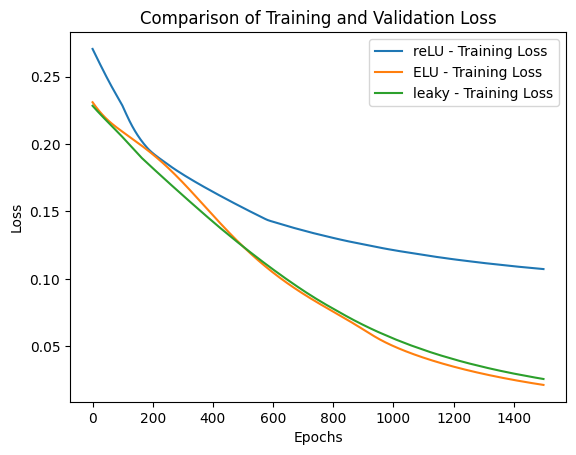

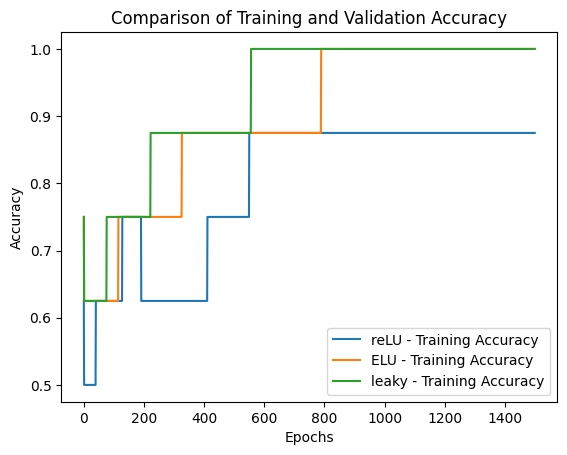

In [8]:
plot_model_comparison(histories=[history, history_with_ELU,
                      history_with_leaky], model_names=["reLU", "ELU", "leaky"])

### Симулируем работу модели

Получаем по 3 веса для каждого нейрона (потому что входное кол-во нейронов = 3) и еще два нейрона сдвига bias в первом слое

Два нейрона на вход одному, значит еще два веса + bias. И того 11 весов (параметров)

In [11]:
weights = model_with_ELU.get_weights()
print(weights)

[array([[ 1.8995335 , -1.0284834 ],
       [ 0.64474255, -0.5657552 ],
       [ 0.73244053, -0.5974546 ]], dtype=float32), array([-0.6648991,  1.0239693], dtype=float32), array([[ 1.5915222],
       [-2.4477067]], dtype=float32), array([-0.30338848], dtype=float32)]


Симулируем работу модели без использования Numpy

In [16]:
def leaky_relu(x, alpha=0.01):
    return x if x > 0 else alpha * x

In [ ]:
def simulate_manual(tensor, weights):
    # Первый слой: W1 * X + b1
    W1, b1, W2, b2 = weights
    hidden = []
    for i in range(len(tensor)):
        h = []
        for j in range(W1.shape[1]):
            weighted_sum = sum(tensor[i][k] * W1[k][j]
                               for k in range(len(tensor[i]))) + b1[j]
            h.append(leaky_relu(weighted_sum))
        hidden.append(h)

    # Второй слой: W2 * Hidden + b2
    output = []
    for i in range(len(hidden)):
        weighted_sum = sum(hidden[i][k] * W2[k][0]
                           for k in range(len(hidden[i]))) + b2[0]
        output.append(1 / (1 + np.exp(-weighted_sum)))  # Sigmoid
    return np.array(output)

Функция для симуляции модели с использованием NumPy

In [ ]:
def simulate_numpy(inputs, weights):
    W1, b1, W2, b2 = weights
    # Первый слой
    hidden = np.maximum(0, np.dot(inputs, W1) + b1) + \
        np.minimum(0, 0.01 * (np.dot(inputs, W1) + b1))  # leaky_relu
    # Второй слой
    output = 1 / (1 + np.exp(-np.dot(hidden, W2) - b2))  # Sigmoid
    return output

Сравним

In [25]:
# Прогоняем данные через модель
manual_untrained = simulate_manual(data, initial_weights_leaky)
numpy_untrained = simulate_numpy(data, initial_weights_leaky)

print("Сравнение результатов для не обученной модели:")
print("Модель:", untrained_predictions_leaky)
print("Ручная симуляция:", manual_untrained)
print("NumPy симуляция:", numpy_untrained)

# Прогоняем данные через модель
trained_predictions_leaky = model_with_leaky.predict(data).flatten()
manual_trained = simulate_manual(data, trained_weights_leaky)
numpy_trained = simulate_numpy(data, trained_weights_leaky)

print("\nСравнение результатов для обученной модели:")
print("Модель:", trained_predictions_leaky)
print("Ручная симуляция:", manual_trained)
print("NumPy симуляция:", numpy_trained)

Сравнение результатов для не обученной модели:
Модель: [0.5        0.5858289  0.54158354 0.6200784  0.5681917  0.65049726
 0.6043435  0.6822992 ]
Ручная симуляция: [0.5        0.5858289  0.54400851 0.62007839 0.56819168 0.65049725
 0.60493639 0.68229916]
NumPy симуляция: [[0.5       ]
 [0.5858289 ]
 [0.54400851]
 [0.62007839]
 [0.56819168]
 [0.65049725]
 [0.60493639]
 [0.68229916]]
1/1 [==============================] - 0s 33ms/step

Сравнение результатов для обученной модели:
Модель: [0.11954933 0.22547777 0.22513303 0.78577244 0.81366915 0.9821867
 0.98214895 0.99856263]
Ручная симуляция: [0.22060822 0.22547776 0.2251456  0.78577246 0.81366908 0.98218662
 0.98214899 0.99856261]
NumPy симуляция: [[0.22060822]
 [0.22547776]
 [0.2251456 ]
 [0.78577246]
 [0.81366908]
 [0.98218662]
 [0.98214899]
 [0.99856261]]
